In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Ouverture fichiers

In [2]:
chemin_fichier_nc = 'era 5/SST (2016 2023).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_2016 = ds.to_dataframe()
sst_era5_2016 = sst_era5_2016.reset_index()
sst_era5_2016 = sst_era5_2016[(sst_era5_2016['latitude'] == -17)&(sst_era5_2016['longitude'] == -150)]
sst_era5_2016.drop(columns='expver', inplace = True)
sst_era5_2016['sst'] = sst_era5_2016['sst'] - 273.15
sst_era5_2016 = sst_era5_2016.rename(columns={'time': 'DateTime'})
sst_era5_day_2016 = sst_era5_2016.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_2016 = sst_era5_day_2016[['DateTime', 'sst']]
sst_era5_day_2016 = sst_era5_day_2016.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (2003 2015).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_2003 = ds.to_dataframe()
sst_era5_2003 = sst_era5_2003.reset_index()
sst_era5_2003 = sst_era5_2003[(sst_era5_2003['latitude'] == -17)&(sst_era5_2003['longitude'] == -150)]
sst_era5_2003['sst'] = sst_era5_2003['sst'] - 273.15
sst_era5_2003 = sst_era5_2003.rename(columns={'time': 'DateTime'})
sst_era5_day_2003 = sst_era5_2003.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_2003 = sst_era5_day_2003[['DateTime', 'sst']]
sst_era5_day_2003 = sst_era5_day_2003.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (1999 2002).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_1999 = ds.to_dataframe()
sst_era5_1999 = sst_era5_1999.reset_index()
sst_era5_1999 = sst_era5_1999[(sst_era5_1999['latitude'] == -17)&(sst_era5_1999['longitude'] == -150)]
sst_era5_1999['sst'] = sst_era5_1999['sst'] - 273.15
sst_era5_1999 = sst_era5_1999.rename(columns={'time': 'DateTime'})
sst_era5_day_1999 = sst_era5_1999.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_1999 = sst_era5_day_1999[['DateTime', 'sst']]
sst_era5_day_1999 = sst_era5_day_1999.reset_index().drop(columns='index')

chemin_fichier_nc = 'era 5/SST (1987 1998).nc'

ds = xr.open_dataset(chemin_fichier_nc)

sst_era5_1987 = ds.to_dataframe()
sst_era5_1987 = sst_era5_1987.reset_index()
sst_era5_1987 = sst_era5_1987[(sst_era5_2003['latitude'] == -17)&(sst_era5_1987['longitude'] == -150)]
sst_era5_1987['sst'] = sst_era5_1987['sst'] - 273.15
sst_era5_1987 = sst_era5_1987.rename(columns={'time': 'DateTime'})
sst_era5_day_1987 = sst_era5_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
sst_era5_day_1987 = sst_era5_day_1987[['DateTime', 'sst']]
sst_era5_day_1987 = sst_era5_day_1987.reset_index().drop(columns='index')

sst_era5_day = pd.concat([sst_era5_day_1987, sst_era5_day_1999], axis = 0)
sst_era5_day = pd.concat([sst_era5_day, sst_era5_day_2003], axis = 0)
sst_era5_day = pd.concat([sst_era5_day, sst_era5_day_2016], axis = 0)
sst_era5_day = sst_era5_day[['DateTime', 'sst']]
sst_era5_day = sst_era5_day.reset_index().drop(columns='index')
sst_era5_day

,DateTime,sst
0,1987-01-01,27.961418
1,1987-01-02,27.900248
2,1987-01-03,27.866877
3,1987-01-04,27.866562
4,1987-01-05,27.898460
...,...,...
13509,2023-12-27,28.291138
13510,2023-12-28,28.225121
13511,2023-12-29,28.480257
13512,2023-12-30,28.564737


Text(0, 0.5, 'Température [°C]')

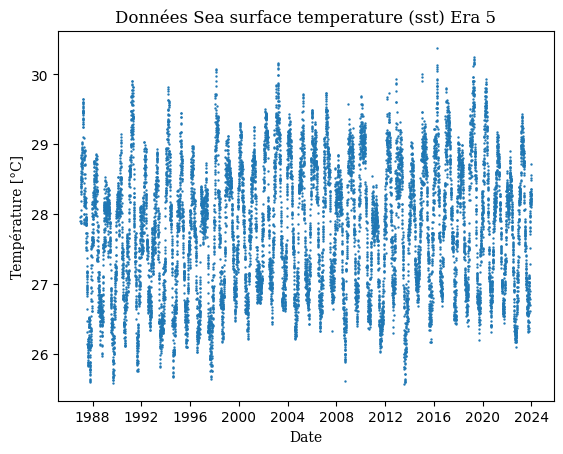

In [3]:
plt.scatter(sst_era5_day['DateTime'], sst_era5_day['sst'], s=.5)
plt.title('Données Sea surface temperature (sst) Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')

In [4]:
temp = pd.read_csv('Thermographe/p8-tiahura.csv', sep= ';')
temp['DateTime'] = temp['DateTime'].astype('datetime64')
temp['°C'] = pd.to_numeric(temp['°C'].str.replace(',', '.'))
temp = temp.rename(columns={'°C': 'Temperature'})
temp['DateTime'] = temp['DateTime'].dt.date
temp['DateTime'] = temp['DateTime'].astype('datetime64[ns]')
temp_2016 = temp[temp['DateTime'].dt.year >=2016]
temp_2016 = temp_2016.sort_values(by = 'DateTime')
temp_2016['DateTime'] = temp_2016['DateTime'].dt.date
temp_2016['DateTime'] = temp_2016['DateTime'].astype('datetime64[ns]')
temp_2016 = temp_2016.reset_index()
temp_2016 = temp_2016.drop(columns='index')

temp_2010 = temp[(temp['DateTime'].dt.year >= 2010) & (temp['DateTime'].dt.year < 2015)]
temp_2010 = temp_2010.sort_values(by = 'DateTime')
temp_2010['DateTime'] = temp_2010['DateTime'].dt.date
temp_2010['DateTime'] = temp_2010['DateTime'].astype('datetime64[ns]')
temp_2010 = temp_2010.reset_index()
temp_2010 = temp_2010.drop(columns='index')

Text(0, 0.5, 'Température [°C]')

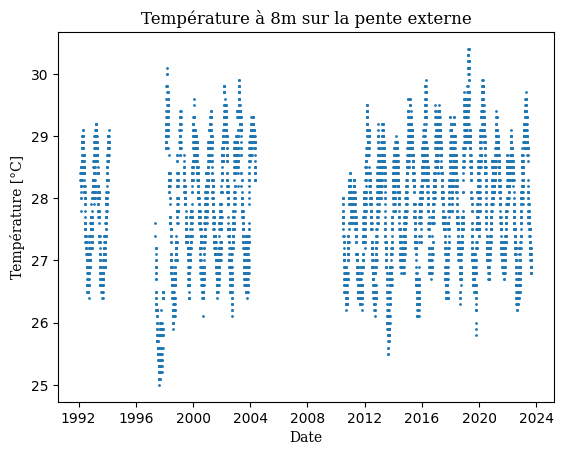

In [5]:
plt.scatter(temp['DateTime'], temp['Temperature'], s = 1)
plt.xlabel('Date', fontfamily = 'serif')
plt.title('Température à 8m sur la pente externe',fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')

# Construction de la table

## Comparaison données in situ & era5

In [6]:
sst_era5_day_2016 = sst_era5_day_2016[(sst_era5_day_2016['DateTime'] >= pd.to_datetime('2016-01-01'))&(sst_era5_day_2016['DateTime'] <= pd.to_datetime('2023-08-28	'))]

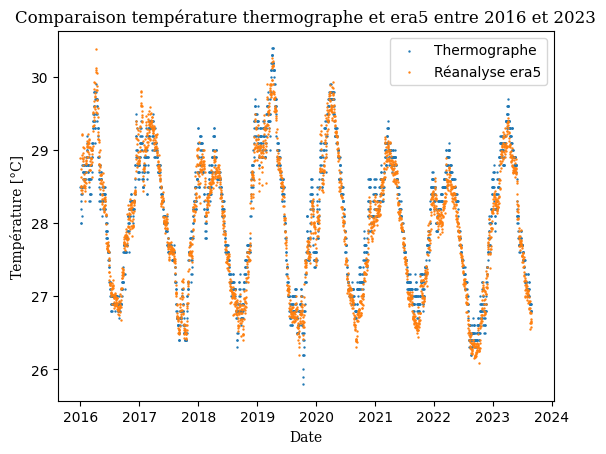

In [7]:
plt.scatter(temp_2016['DateTime'], temp_2016['Temperature'], s = .5, label = 'Thermographe')
plt.scatter(sst_era5_day_2016['DateTime'], sst_era5_day_2016['sst'], s=.5, label='Réanalyse era5')
plt.title('Comparaison température thermographe et era5 entre 2016 et 2023', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')
plt.legend()

In [8]:
print("corrélation :", temp_2016['Temperature'].corr(sst_era5_day_2016['sst']))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(temp_2016['Temperature']), sst_era5_day_2016['sst'])))

corrélation : 0.9714917009277878
rmse : 0.22877865377499643


Text(0, 0.5, 'Température era5 [°C]')

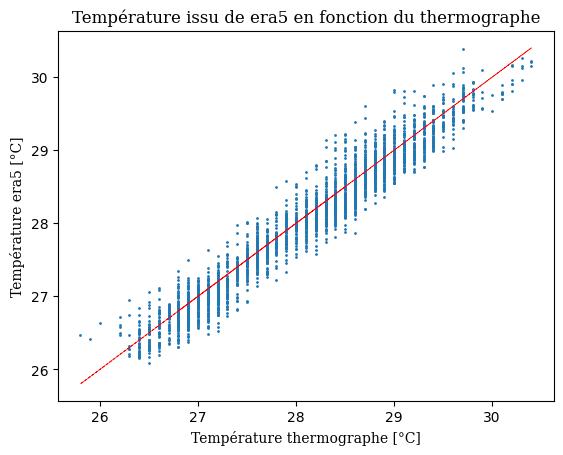

In [9]:
plt.scatter(temp_2016['Temperature'], sst_era5_day_2016['sst'].loc[:temp_2016.shape[0]-1], s = 1)
plt.plot(temp_2016['Temperature'], temp_2016['Temperature'], color = 'r', linestyle = '--', linewidth = .6)
plt.title('Température issu de era5 en fonction du thermographe', fontfamily = 'serif')
plt.xlabel('Température thermographe [°C]', fontfamily = 'serif')
plt.ylabel('Température era5 [°C]', fontfamily = 'serif')

In [10]:
ratio = sst_era5_day_2016['sst']/temp_2016['Temperature']
dispersion = temp_2016['Temperature'] - sst_era5_day_2016['sst']

In [11]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
# Paramètres de la moyenne mobile
window_size = 17

x = np.array(ratio)
x_smoothed = moving_average(x.squeeze(), window_size)

y = np.array(dispersion)
y_smoothed = moving_average(y.squeeze(), window_size)

(16801.0, 17167.0)

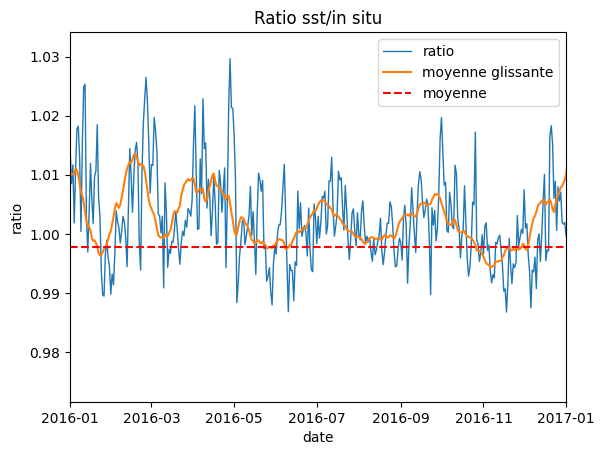

In [12]:
plt.plot(sst_era5_day_2016['DateTime'].loc[:ratio.shape[0] - window_size], ratio.loc[:ratio.shape[0] - window_size], linewidth = 1, label = 'ratio')
plt.plot(sst_era5_day_2016['DateTime'].loc[:ratio.shape[0] - window_size], x_smoothed, label = 'moyenne glissante')
plt.axhline(y=ratio.mean(), color='r', linestyle='--', label = 'moyenne')
plt.title('Ratio sst/in situ')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()
plt.xlim(pd.to_datetime('2016'), pd.to_datetime('2017'))

(16801.0, 17167.0)

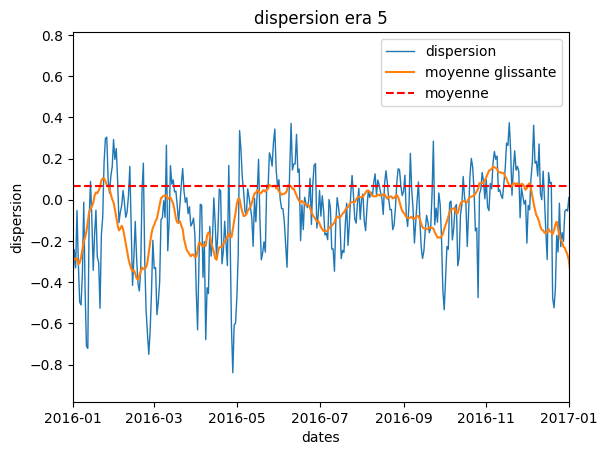

In [13]:
plt.plot(sst_era5_day_2016['DateTime'].loc[:dispersion.shape[0] - window_size], dispersion.loc[:dispersion.shape[0] - window_size], linewidth = 1, label = 'dispersion')
plt.plot(sst_era5_day_2016['DateTime'].loc[:dispersion.shape[0] - window_size], y_smoothed, label = 'moyenne glissante')
plt.axhline(y=dispersion.mean(), color='r', linestyle='--', label = 'moyenne')
plt.title('dispersion era 5')
plt.xlabel('dates')
plt.ylabel('dispersion')
plt.legend()
plt.xlim(pd.to_datetime('2016'), pd.to_datetime('2017'))

## Régression linéaire

In [14]:
len = 2500
# Train
X_train = np.array(sst_era5_day_2016['sst'].loc[:len]).reshape(-1, 1)
Y_train = np.array(temp_2016['Temperature'].loc[:len])

#Test
X_test = np.array(sst_era5_day_2016['sst'].loc[len:2796]).reshape(-1, 1)

model = linear_model.LinearRegression()

model.fit(X_train, Y_train)

#Pente & ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Redressez Y en fonction de X
Y_test = slope * X_test + intercept

# Affichez les résultats
print("Pente (coefficient) :", slope)
print("Ordonnée à l'origine :", intercept)
print("r2 :", metrics.r2_score(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test)))

Pente (coefficient) : 0.94757277
Ordonnée à l'origine : 1.5283775
r2 : 0.9318305078235496
rmse : 0.22138472820041535


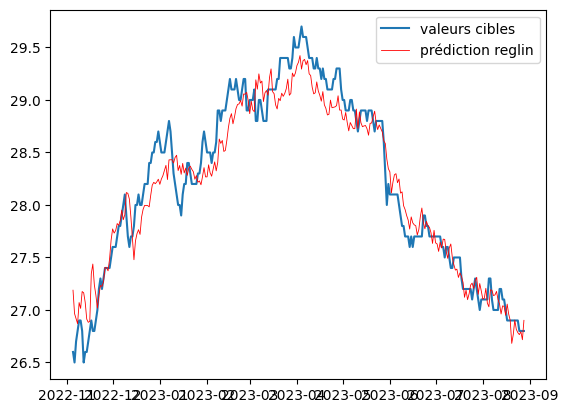

In [15]:
plt.plot(temp_2016['DateTime'].loc[len:2796],temp_2016['Temperature'].loc[len:2796], label = 'valeurs cibles')
plt.plot(temp_2016['DateTime'].loc[len:2796], slope * X_test + intercept, color = 'r', linewidth = .6, label = 'prédiction reglin')
plt.legend()

## Régression polynomiale

In [16]:
len = 2500

# Train
X_train = np.array(sst_era5_day_2016['sst'].loc[:len]).reshape(-1, 1)
Y_train = np.array(temp_2016['Temperature'].loc[:len])

#Test
X_test = np.array(sst_era5_day_2016['sst'])[len:].reshape(-1, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)

r2 : 0.9317797595450257
rmse : 0.22146711698851815


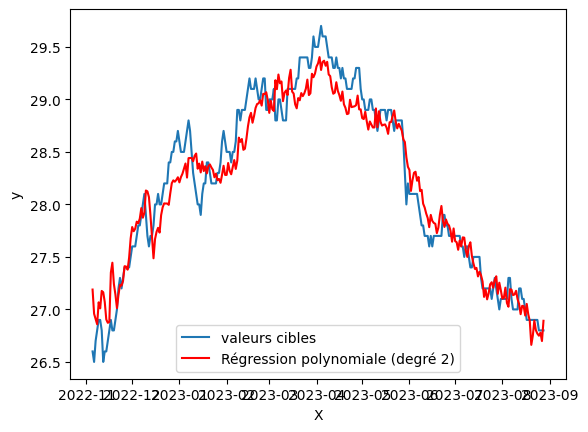

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test)))

# Tracer les données et la courbe de régression polynomiale
plt.plot(temp_2016['DateTime'].loc[len:2796],temp_2016['Temperature'].loc[len:2796], label = 'valeurs cibles')
plt.plot(temp_2016['DateTime'].loc[len:2796], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Detrending

In [18]:
import statsmodels.api as sm

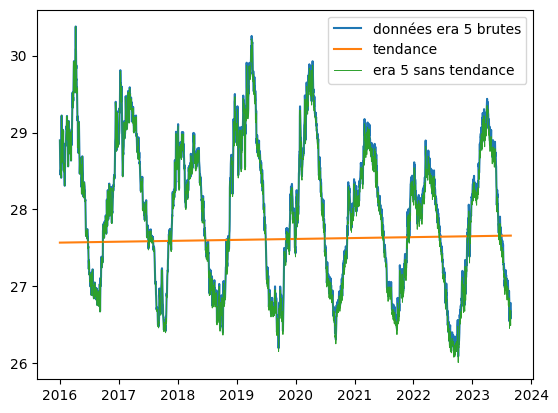

In [19]:
# detrending era 5
temps_numerique = np.arange(sst_era5_day.shape[0])

# Ajuster une régression linéaire
model = LinearRegression()
model.fit(temps_numerique.reshape(-1, 1), np.array(sst_era5_day['sst']))

# Obtenir les coefficients de la tendance linéaire
pente = model.coef_[0]
intercept = model.intercept_

plt.plot(sst_era5_day_2016['DateTime'], sst_era5_day_2016['sst'], label = 'données era 5 brutes')
plt.plot(sst_era5_day_2016['DateTime'], pente * temps_numerique[:sst_era5_day_2016.shape[0]] + intercept, label = 'tendance')
plt.plot(sst_era5_day_2016['DateTime'], sst_era5_day_2016['sst'] - pente * temps_numerique[:sst_era5_day_2016.shape[0]], linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

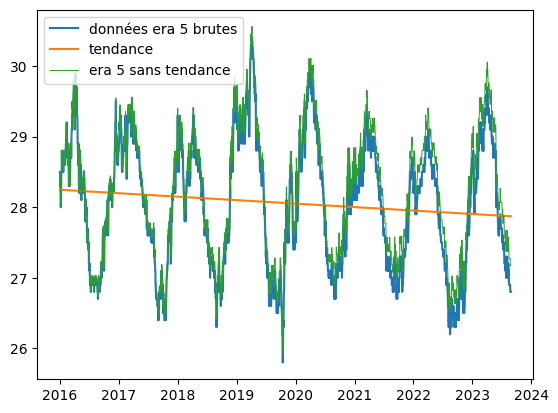

In [20]:
# detrending données capteur
temps_numerique_capt = np.arange(temp_2016.shape[0])

# Ajuster une régression linéaire
model_capt = LinearRegression()
model_capt.fit(temps_numerique_capt.reshape(-1, 1), np.array(temp_2016['Temperature']))

# Obtenir les coefficients de la tendance linéaire
pente_capt = model_capt.coef_[0]
intercept_capt = model_capt.intercept_

plt.plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'données era 5 brutes')
plt.plot(temp_2016['DateTime'], pente_capt * temps_numerique_capt + intercept_capt, label = 'tendance')
plt.plot(temp_2016['DateTime'], temp_2016['Temperature'] - pente_capt * temps_numerique_capt, linewidth = .7, label = 'era 5 sans tendance')
plt.legend()

## regression polynomiale

In [21]:
len = 2500

# Train
X_train = np.array((sst_era5_day_2016['sst'] - pente * temps_numerique[:sst_era5_day_2016.shape[0]]).loc[:len]).reshape(-1, 1)
Y_train = np.array((temp_2016['Temperature'] - pente_capt * temps_numerique_capt).loc[:len])

#Test
X_test = np.array(sst_era5_day_2016['sst'] - pente * temps_numerique[:sst_era5_day_2016.shape[0]])[len:].reshape(-1, 1)

# Créer un objet PolynomialFeatures pour transformer les caractéristiques
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X_train)

r2 : 0.9163333420092241
rmse : 0.2452611950663576


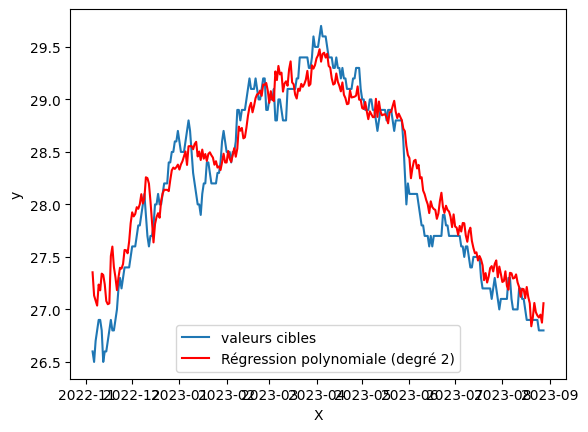

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

# Test
X_test_poly = poly_features.transform(X_test)
Y_test = lin_reg.predict(X_test_poly)

# Erreur
print("r2 :", metrics.r2_score(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test))
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(temp_2016['Temperature'].loc[len:2796]), Y_test)))

plt.plot(temp_2016['DateTime'].loc[len:2796],temp_2016['Temperature'].loc[len:2796], label = 'valeurs cibles')
plt.plot(temp_2016['DateTime'].loc[len:2796], Y_test, 'r-', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

##  Filtre

In [23]:
len_train = 2500
r = 15
N = 2797 
X_train = np.ones((len_train, (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X_train[:, j] = np.roll(sst_era5_day_2016['sst'].iloc[:len_train], r - j)

Y = np.array(temp_2016['Temperature'].iloc[:len_train]).reshape(-1, 1)
Y.shape

X_test = np.ones((N - len_train, (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X_test[:, j] = np.roll(sst_era5_day_2016['sst'].iloc[len_train:N], r - j)

In [24]:
h, residuals, _, _ = np.linalg.lstsq(X_train, Y, rcond=None)
print("corrélation :", np.corrcoef(np.array(temp_2016['Temperature'].loc[len:N]).reshape(1, 297),np.dot(X_test, h).reshape(1, 297))[0, 1])
print("rmse :", np.sqrt(metrics.mean_squared_error(np.array(temp_2016['Temperature'].loc[len_train:N]), np.dot(X_test, h))))

corrélation : 0.9775917750206873
rmse : 0.19764339822133442


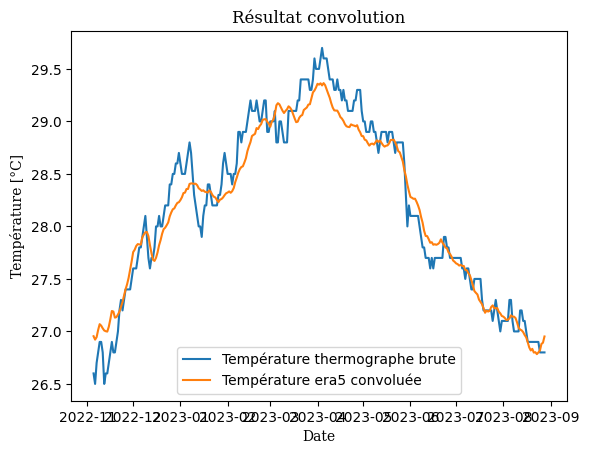

In [25]:
plt.plot(temp_2016['DateTime'].loc[len_train:], temp_2016['Temperature'].loc[len_train:], label = 'Température thermographe brute')
plt.plot(sst_era5_day_2016['DateTime'].iloc[len_train:temp_2016.shape[0]], np.dot(X_test, h), label = 'Température era5 convoluée')
plt.title('Résultat convolution', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')
plt.legend()

## Création dataframe 

In [26]:
X = np.ones((sst_era5_day.shape[0], (2*r + 1) + 1)) #rajout du biais
for j in range((2*r + 1) - 1):
    X[:, j] = np.roll(sst_era5_day['sst'], r - j)

sst_era5_adjusted = pd.concat([sst_era5_day, pd.DataFrame(np.dot(X, h))], axis = 1)
sst_era5_adjusted = sst_era5_adjusted.drop(columns='sst')
sst_era5_adjusted = sst_era5_adjusted.rename(columns = {0:'sst'})
sst_era5_adjusted

,DateTime,sst
0,1987-01-01,28.076666
1,1987-01-02,28.034892
2,1987-01-03,28.042426
3,1987-01-04,28.041670
4,1987-01-05,28.101721
...,...,...
13509,2023-12-27,28.355878
13510,2023-12-28,28.388756
13511,2023-12-29,28.390780
13512,2023-12-30,28.332722


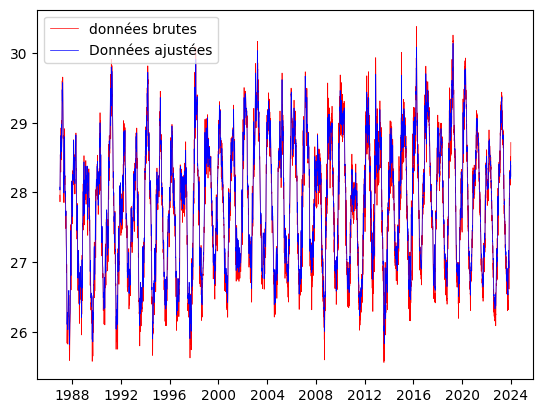

In [27]:
plt.plot(sst_era5_day['DateTime'], sst_era5_day['sst'], color = 'r', label = 'données brutes', linewidth = .5)
plt.plot(sst_era5_adjusted['DateTime'], sst_era5_adjusted['sst'], color = 'b', label = 'Données ajustées', linewidth = .5)
plt.legend()

In [28]:
# Définir la colonne date comme index dans les deux DataFrames
temp.set_index('DateTime', inplace=True)
sst_era5_day.set_index('DateTime', inplace=True)

# Fusionner les deux DataFrames en utilisant la méthode 'outer' pour inclure toutes les dates de 'df_temp' et 'df_autre'
fill_sst = pd.merge(temp, sst_era5_day, left_index=True, right_index=True, how='outer')

# Remplir les valeurs manquantes de température avec les valeurs existantes de 'df_autre'
fill_sst['sst'] = fill_sst['Temperature'].fillna(fill_sst['sst'])

# Réinitialiser l'index pour avoir une colonne date
fill_sst.reset_index(inplace=True)
fill_sst = fill_sst.drop(columns='Temperature')
fill_sst = fill_sst.rename(columns={'sst':'Temperature'})
temp = temp.reset_index()

Text(0, 0.5, 'Température [°C]')

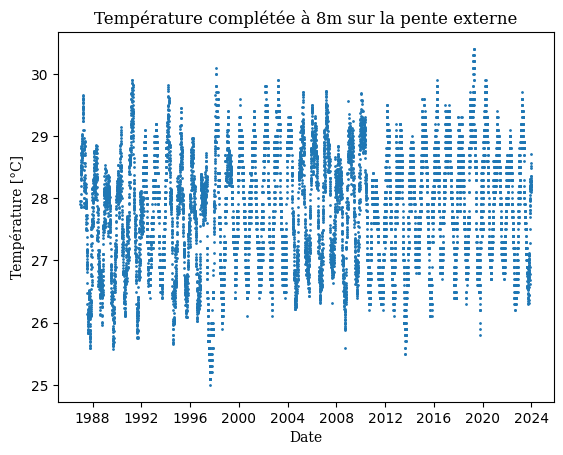

In [29]:
plt.scatter(fill_sst['DateTime'], fill_sst['Temperature'], s = 1)
plt.title('Température complétée à 8m sur la pente externe', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')

# Indicateurs

## MMM 

In [30]:
monthly_means = fill_sst.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means['MMM'] = monthly_means['Temperature'].rolling(window=12, min_periods=1).max()

In [31]:
monthly_means['Mois'] = monthly_means['DateTime'].dt.to_period('M')
fill_sst['Mois'] = fill_sst['DateTime'].dt.to_period('M')
fill_sst = pd.merge(fill_sst, monthly_means[['Mois', 'MMM']], on='Mois', how='left')
fill_sst.drop(columns='Mois', inplace = True)

Text(0, 0.5, 'Date')

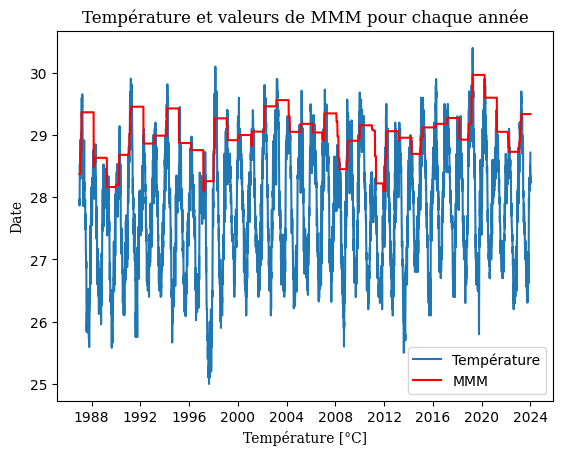

In [32]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Température')
plt.plot(fill_sst['DateTime'], fill_sst['MMM'], color = 'r', label = 'MMM')
plt.legend()
plt.title('Température et valeurs de MMM pour chaque année', fontfamily = 'serif')
plt.xlabel('Température [°C]', fontfamily = 'serif')
plt.ylabel('Date', fontfamily = 'serif')

## DHW

In [33]:
fill_sst['hotspot / 7'] = (fill_sst['Temperature'] - fill_sst['MMM'])/7
fill_sst['hotspot / 7'][fill_sst['hotspot / 7'] < 0] = 0

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/2512061249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['hotspot / 7'][fill_sst['hotspot / 7'] < 0] = 0


In [34]:
fill_sst['dhw'] = fill_sst['hotspot / 7'].rolling(window=7*35, min_periods=1).sum()
fill_sst = fill_sst.drop(columns='hotspot / 7')

Text(0, 0.5, 'DHW [°C/weeks]')

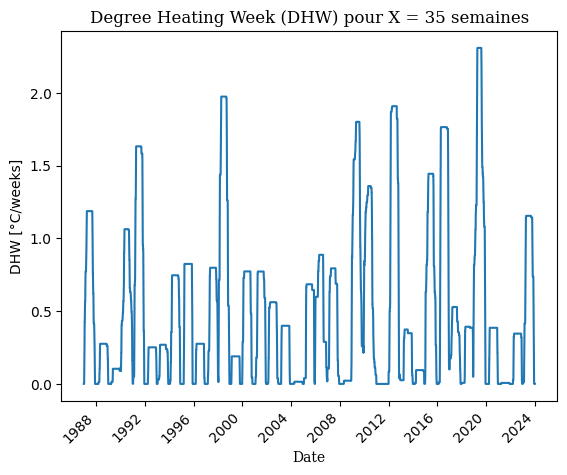

In [35]:
plt.plot(fill_sst['DateTime'], fill_sst['dhw'])
plt.xticks(rotation=45, ha='right')
plt.title('Degree Heating Week (DHW) pour X = 35 semaines', fontfamily = 'serif')
plt.xlabel('Date',fontfamily = 'serif' )
plt.ylabel('DHW [°C/weeks]')

## Acute thermal stress

In [36]:
threshold = 0.8
fill_sst['excess'] = fill_sst.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
fill_sst['excess'] = fill_sst['excess'].rolling(window = 140, min_periods= 140).sum()
fill_sst['Acute thermal stress'] = fill_sst.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
fill_sst.drop(columns='excess', inplace = True)
fill_sst

,DateTime,Temperature,MMM,dhw,Acute thermal stress
0,1987-01-01,27.961418,28.372055,0.0,0
1,1987-01-02,27.900248,28.372055,0.0,0
2,1987-01-03,27.866877,28.372055,0.0,0
3,1987-01-04,27.866562,28.372055,0.0,0
4,1987-01-05,27.898460,28.372055,0.0,0
...,...,...,...,...,...
13509,2023-12-27,28.291138,29.336667,0.0,0
13510,2023-12-28,28.225121,29.336667,0.0,0
13511,2023-12-29,28.480257,29.336667,0.0,0
13512,2023-12-30,28.564737,29.336667,0.0,0


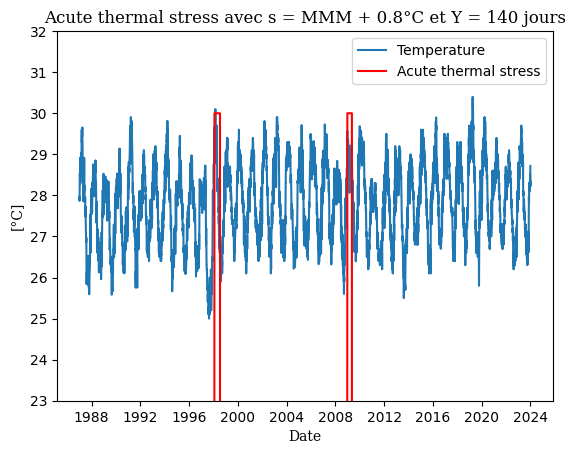

In [37]:
plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Temperature')
plt.plot(fill_sst['DateTime'], fill_sst['Acute thermal stress']*30, color = 'r', label = 'Acute thermal stress')
plt.title('Acute thermal stress avec s = MMM + 0.8°C et Y = 140 jours', fontfamily = 'serif')
plt.ylabel('[°C]', fontfamily = 'serif')
plt.xlabel('Date', fontfamily = 'serif')
plt.ylim(23, 32)
plt.legend()

## Thermal trajectory

In [38]:
threshold = 0.5

fill_sst['thermal_stress_category'] = ''

for i in range(fill_sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(fill_sst['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        fill_sst['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        fill_sst['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if fill_sst['Temperature'].iloc[i-10] >= fill_sst['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        fill_sst['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(fill_sst['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > fill_sst['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        fill_sst['thermal_stress_category'].iloc[i] = 0
    
    if fill_sst['thermal_stress_category'].iloc[i] == '':
        fill_sst['thermal_stress_category'].iloc[i] = 0.5

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3917352371.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category'].iloc[i] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3917352371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category'].iloc[i] = 2
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3917352371.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Text(0, 0.5, 'Temperature')

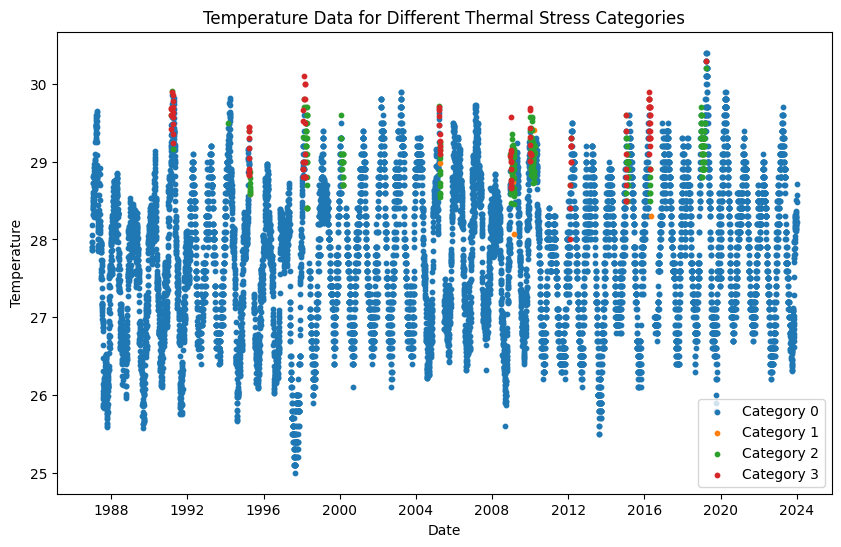

In [39]:
plt.figure(figsize=(10, 6))

for category in range(4):
    category_data = fill_sst[fill_sst['thermal_stress_category'] == category]
    plt.scatter(category_data['DateTime'], category_data['Temperature'], label=f'Category {category}', s = 10)

plt.legend()
plt.title('Temperature Data for Different Thermal Stress Categories')
plt.xlabel('Date')
plt.ylabel('Temperature')

## Comparaison indicateurs de température entre era 5 et capteurs

In [40]:
sst_test = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2016-01-01'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2023-08-28'))]

In [41]:
sst_test_2010 = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2010-06-21'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2014-12-31'))]

### MMM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


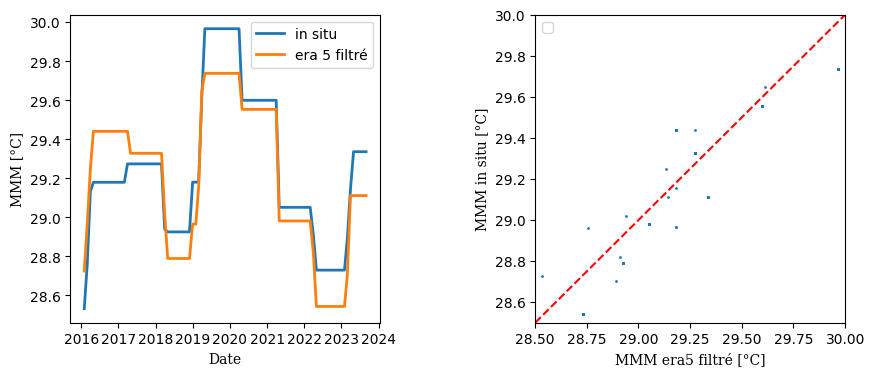

In [42]:
# accumulation window = 3 mois
monthly_means_era5 = sst_test.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_era5['MMM'] = monthly_means_era5['sst'].rolling(window=12, min_periods=1).max()

# accumulation window = 3 mois
monthly_means_capt = temp_2016.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_capt['MMM'] = monthly_means_capt['Temperature'].rolling(window=12, min_periods=1).max()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# Premier sous-graphique
axs[0].plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM'], label = 'in situ', linewidth = 2)
axs[0].plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM'], linewidth = 2, label = 'era 5 filtré')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('MMM [°C]', fontfamily = 'serif')
axs[0].legend()

# Deuxième sous-graphique
axs[1].scatter(monthly_means_capt['MMM'], monthly_means_era5['MMM'], s = 1)
axs[1].plot(np.linspace(28, 30, 10), np.linspace(28, 30, 10), color = 'r', linestyle = '--')
axs[1].set_xlabel('MMM era5 filtré [°C]', fontfamily = 'serif')
axs[1].set_ylabel('MMM in situ [°C]', fontfamily = 'serif')
axs[1].set_ylim(28.5, 30)
axs[1].set_xlim(28.5, 30)
axs[1].legend()




In [43]:
print("rmse :", np.sqrt(metrics.mean_squared_error(monthly_means_capt['MMM'], monthly_means_era5['MMM'])))

rmse : 0.16495255996620975


In [44]:
# Capteur
monthly_means_capt['Mois'] = monthly_means_capt['DateTime'].dt.to_period('M')
temp_2016['Mois'] = temp_2016['DateTime'].dt.to_period('M')
temp_2016 = pd.merge(temp_2016, monthly_means_capt[['Mois', 'MMM']], on='Mois', how='left')
temp_2016.drop(columns='Mois', inplace = True)

# era 5
monthly_means_era5['Mois'] = monthly_means_era5['DateTime'].dt.to_period('M')
sst_test['Mois'] = sst_test['DateTime'].dt.to_period('M')
sst_test = pd.merge(sst_test, monthly_means_era5[['Mois', 'MMM']], on='Mois', how='left')
sst_test.drop(columns='Mois', inplace = True)

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3983776610.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_test['Mois'] = sst_test['DateTime'].dt.to_period('M')


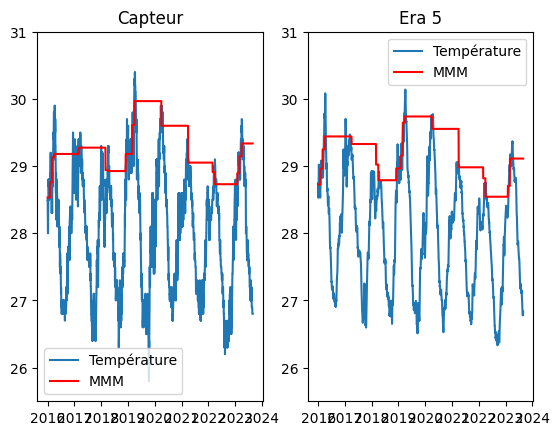

In [45]:
fig, axs = plt.subplots(1, 2)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['MMM'], color = 'r', label = 'MMM')
axs[0].set_title('Capteur')
axs[0].set_ylim(25.5, 31)
axs[0].legend()

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['MMM'], color = 'r', label = 'MMM')
axs[1].set_title('Era 5')
axs[1].set_ylim(25.5, 31)
axs[1].legend()

Text(0.5, 1.0, 'Incertitude MMM')

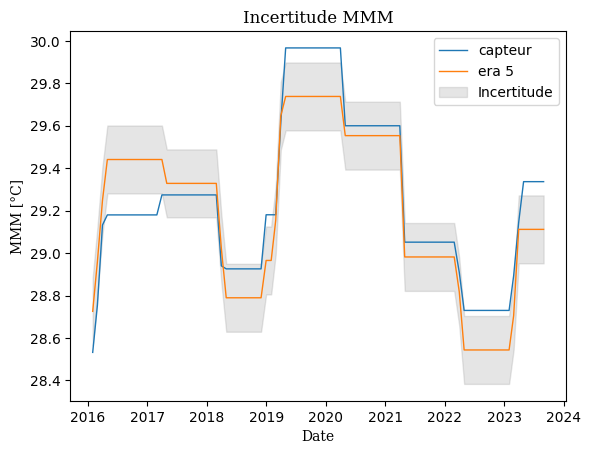

In [46]:
ecart = 0.16
plt.plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM'], label = 'capteur', linewidth = 1)
plt.plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM'], linewidth = 1, label = 'era 5')
plt.fill_between(monthly_means_era5['DateTime'], monthly_means_era5['MMM'] - ecart, monthly_means_era5['MMM'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('MMM [°C]', fontfamily = 'serif')
plt.title('Incertitude MMM', fontfamily = 'serif')

In [47]:
# Vérification
test = pd.merge(sst_test_2010, temp_2010, on = 'DateTime', how = 'inner')

# accumulation window = 3 mois
monthly_means_era5 = sst_test_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_era5['MMM_era5'] = monthly_means_era5['sst'].rolling(window=12, min_periods=1).max()

# accumulation window = 3 mois
monthly_means_capt = temp_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_capt['MMM_capt'] = monthly_means_capt['Temperature'].rolling(window=12, min_periods=1).max()

In [48]:
# Capteur
monthly_means_capt['Mois'] = monthly_means_capt['DateTime'].dt.to_period('M')
monthly_means_era5['Mois'] = monthly_means_era5['DateTime'].dt.to_period('M')
test['Mois'] = test['DateTime'].dt.to_period('M')
test = pd.merge(test, monthly_means_capt[['Mois', 'MMM_capt']], on='Mois', how='left')
test = pd.merge(test, monthly_means_era5[['Mois', 'MMM_era5']], on='Mois', how='left')
test.drop(columns='Mois', inplace = True)

Text(0.5, 1.0, 'Incertitude MMM')

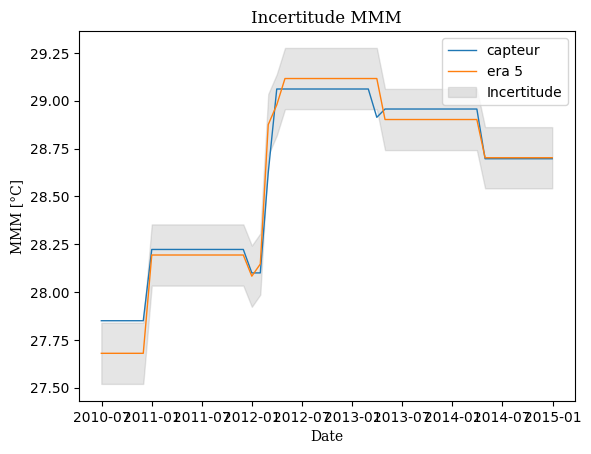

In [49]:
ecart = 0.16
plt.plot(monthly_means_capt['DateTime'], monthly_means_capt['MMM_capt'], label = 'capteur', linewidth = 1)
plt.plot(monthly_means_era5['DateTime'], monthly_means_era5['MMM_era5'], linewidth = 1, label = 'era 5')
plt.fill_between(monthly_means_era5['DateTime'], monthly_means_era5['MMM_era5'] - ecart, monthly_means_era5['MMM_era5'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('MMM [°C]', fontfamily = 'serif')
plt.title('Incertitude MMM', fontfamily = 'serif')

### DHW

In [50]:
temp_2016['hotspot / 7'] = (temp_2016['Temperature'] - temp_2016['MMM'])/7
temp_2016['hotspot / 7'][temp_2016['hotspot / 7'] < 0] = 0

sst_test['hotspot / 7'] = (sst_test['sst'] - sst_test['MMM'])/7
sst_test['hotspot / 7'][sst_test['hotspot / 7'] < 0] = 0

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3072240098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2016['hotspot / 7'][temp_2016['hotspot / 7'] < 0] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3072240098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_test['hotspot / 7'][sst_test['hotspot / 7'] < 0] = 0


In [51]:
temp_2016['dhw'] = temp_2016['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
temp_2016 = temp_2016.drop(columns='hotspot / 7')

sst_test['dhw'] = sst_test['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
sst_test = sst_test.drop(columns='hotspot / 7')

(0.0, 3.0)

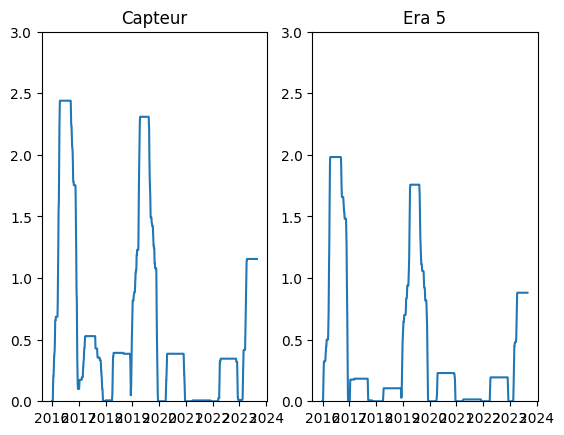

In [52]:
fig, axs = plt.subplots(1, 2)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['dhw'])
axs[0].set_title('Capteur')
axs[0].set_ylim(0, 3)

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['dhw'])
axs[1].set_title('Era 5')
axs[1].set_ylim(0, 3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


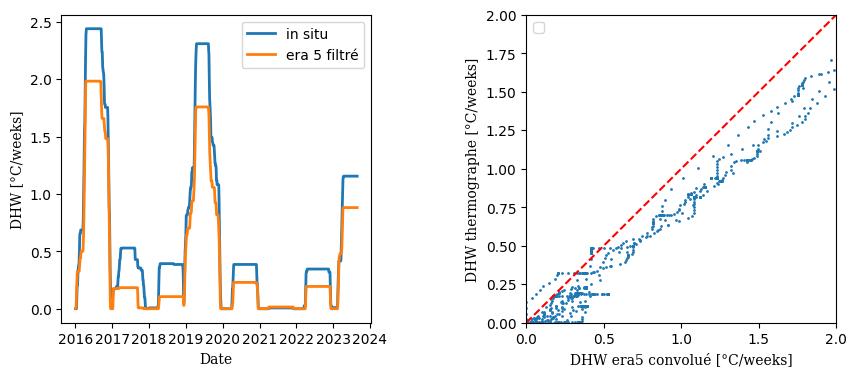

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['dhw'], label = 'in situ', linewidth = 2)
axs[0].plot(sst_test['DateTime'], sst_test['dhw'], linewidth = 2, label = 'era 5 filtré')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('DHW [°C/weeks]', fontfamily = 'serif')
axs[0].legend()

# Deuxième sous-graphique
axs[1].scatter(temp_2016['dhw'], sst_test['dhw'], s = 1)
axs[1].plot(np.linspace(0, 2.5, 10), np.linspace(0, 2.5, 10), color = 'r', linestyle = '--')
axs[1].set_xlabel('DHW era5 convolué [°C/weeks]', fontfamily = 'serif')
axs[1].set_ylabel('DHW thermographe [°C/weeks]', fontfamily = 'serif')
axs[1].set_ylim(0, 2)
axs[1].set_xlim(0,2)
axs[1].legend()

In [54]:
print("rmse :", np.sqrt(metrics.mean_squared_error(temp_2016['dhw'], sst_test['dhw'])))

rmse : 0.24933454939488386


#### Calcul incertitude

Text(0.5, 1.0, 'DHW')

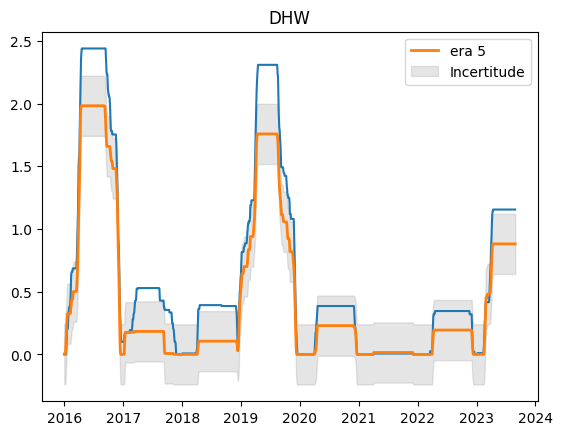

In [55]:
ecart = 0.25
plt.plot(temp_2016['DateTime'], temp_2016['dhw'])
plt.plot(sst_test['DateTime'], sst_test['dhw'], linewidth = 2, label = 'era 5')
plt.fill_between(sst_test['DateTime'], sst_test['dhw'] - 0.24, sst_test['dhw'] + 0.24, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.title('DHW')

#### Vérification

In [56]:
temp = temp.reset_index()

In [57]:
temp_2010 = temp[(temp['DateTime'].dt.year >=2011) & (temp['DateTime'].dt.year <=2015)]
temp_2010 = temp_2010.reset_index()

In [58]:
sst = sst_era5_adjusted[(sst_era5_adjusted['DateTime'] >= pd.to_datetime('2011-04-02'))&(sst_era5_adjusted['DateTime'] <= pd.to_datetime('2015-12-31'))]

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3044109446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2010['hotspot / 7'][temp_2010['hotspot / 7'] < 0] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3044109446.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst['Mois'] = sst['DateTime'].dt.to_period('M')
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3044109446.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

Text(0.5, 1.0, 'Incertitudes DHW sur un autre échantillon')

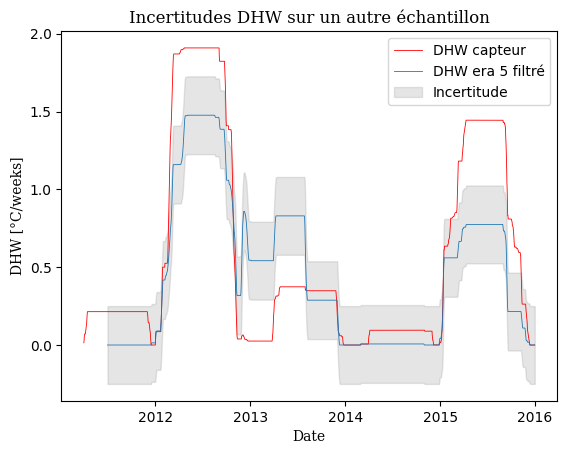

In [59]:
# accumulation window = 3 mois
monthly_means_test = temp_2010.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_test['MMM'] = monthly_means_test['Temperature'].rolling(window=12, min_periods=1).max()

monthly_means_test['Mois'] = monthly_means_test['DateTime'].dt.to_period('M')
temp_2010['Mois'] = temp_2010['DateTime'].dt.to_period('M')
temp_2010 = pd.merge(temp_2010, monthly_means_test[['Mois', 'MMM']], on='Mois', how='left')
temp_2010.drop(columns='Mois', inplace = True)

temp_2010['hotspot / 7'] = (temp_2010['Temperature'] - temp_2010['MMM'])/7
temp_2010['hotspot / 7'][temp_2010['hotspot / 7'] < 0] = 0

temp_2010 = temp_2010.loc[91:]
temp_2010['dhw'] = temp_2010['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
temp_2010 = temp_2010.drop(columns='hotspot / 7')

# accumulation window = 3 mois
monthly_means_test = sst.groupby(pd.Grouper(key='DateTime', freq='1M')).mean().reset_index()
monthly_means_test['MMM'] = monthly_means_test['sst'].rolling(window=12, min_periods=1).max()

monthly_means_test['Mois'] = monthly_means_test['DateTime'].dt.to_period('M')
sst['Mois'] = sst['DateTime'].dt.to_period('M')
sst = pd.merge(sst, monthly_means_test[['Mois', 'MMM']], on='Mois', how='left')
sst.drop(columns='Mois', inplace = True)

sst['hotspot / 7'] = (sst['sst'] - sst['MMM'])/7
sst['hotspot / 7'][sst['hotspot / 7'] < 0] = 0

sst = sst.loc[91:]
sst['dhw'] = sst['hotspot / 7'].rolling(window=35*7, min_periods=1).sum()
sst = sst.drop(columns='hotspot / 7')

plt.plot(temp_2010['DateTime'], temp_2010['dhw'], linewidth = .6, label = 'DHW capteur', color = 'r')
plt.plot(sst['DateTime'], sst['dhw'], linewidth = .6, label = 'DHW era 5 filtré')
plt.fill_between(sst['DateTime'], sst['dhw'] - ecart, sst['dhw'] + ecart, color='gray', alpha=0.2, label='Incertitude')
plt.legend()
plt.xlabel('Date', fontfamily = 'serif')
plt.ylabel('DHW [°C/weeks]', fontfamily = 'serif')
plt.title('Incertitudes DHW sur un autre échantillon', fontfamily = 'serif')

### Acute thermal stress

In [60]:
threshold = 0.5
temp_2016['excess'] = temp_2016.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2016['excess'] = temp_2016['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2016['Acute thermal stress'] = temp_2016.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2016.drop(columns='excess', inplace = True)

sst_test['excess'] = sst_test.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst_test['excess'] = sst_test['excess'].rolling(window = 140, min_periods= 140).sum()
sst_test['Acute thermal stress'] = sst_test.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
# sst_test.drop(columns='excess', inplace = True)

In [61]:
threshold = 0.5
temp_2016['excess'] = temp_2016.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2016['excess'] = temp_2016['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2016['Acute thermal stress'] = temp_2016.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2016.drop(columns='excess', inplace = True)

sst_test['excess'] = sst_test.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst_test['excess'] = sst_test['excess'].rolling(window = 140, min_periods= 140).sum()
sst_test['Acute thermal stress'] = sst_test.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
# sst_test.drop(columns='excess', inplace = True)

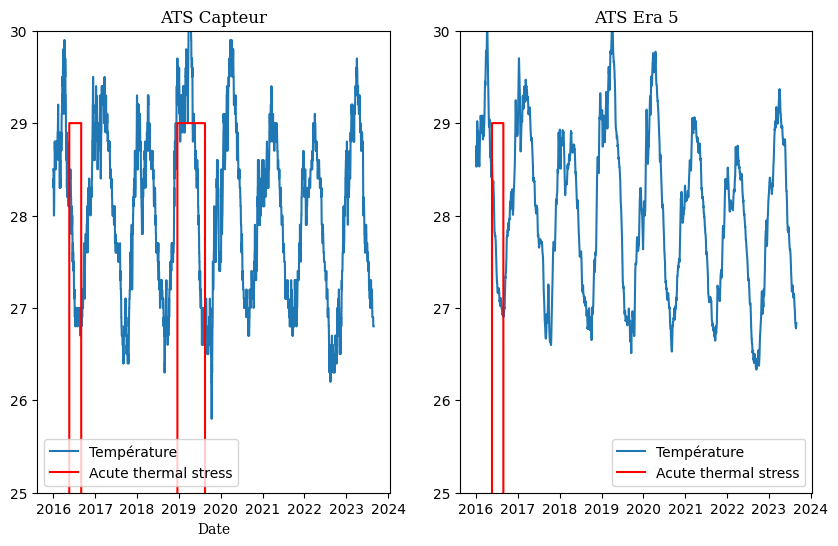

In [62]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('ATS Capteur', fontfamily = 'serif')
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].set_title('ATS Era 5', fontfamily = 'serif')
axs[1].set_ylim(25, 30)
axs[1].legend()

#### Calcul incertitude

In [63]:
deltaT = 0.09
deltaMMM = 0.08

In [64]:
sst_test['excess max'] = sst_test.apply(lambda row: 1 if row['sst'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
sst_test['excess max'] = sst_test['excess max'].rolling(window = 140, min_periods= 90).sum()
sst_test['Acute thermal stress plage'] = sst_test.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
sst_test.drop(columns='excess max', inplace = True)

<Figure size 1000x2000 with 0 Axes>

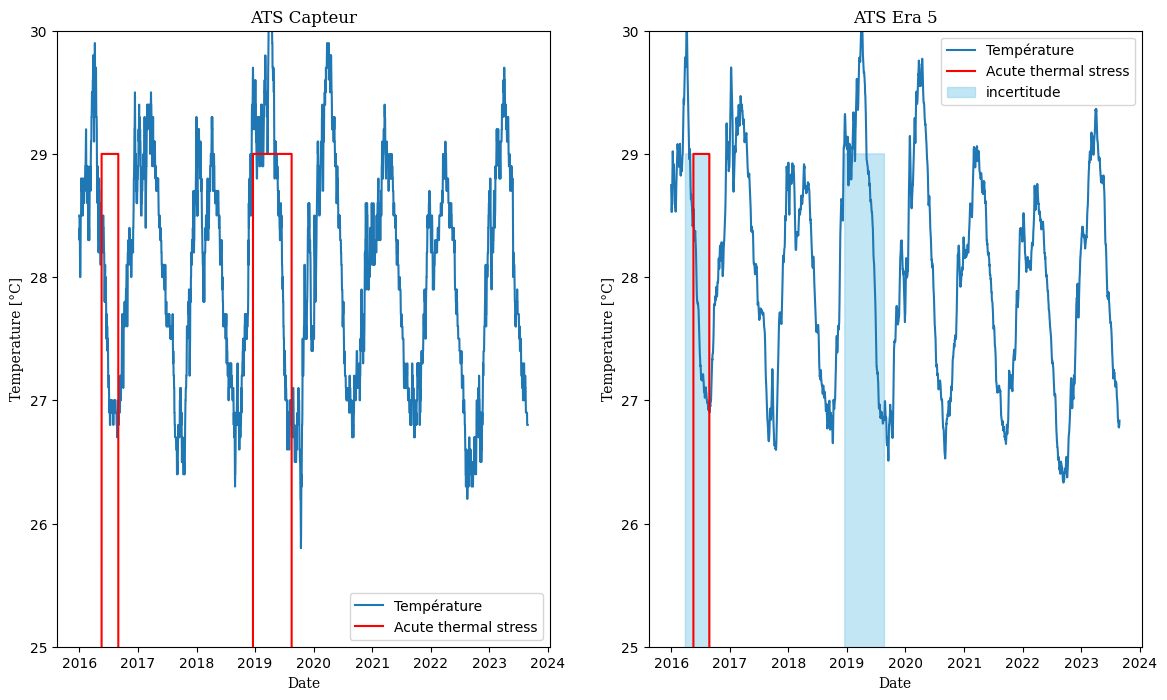

In [65]:
plt.figure(figsize=(10,20))
fig, axs = plt.subplots(1, 2, figsize = (14, 8))


# Premier sous-graphique
axs[0].plot(temp_2016['DateTime'], temp_2016['Temperature'], label = 'Température')
axs[0].plot(temp_2016['DateTime'], temp_2016['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('ATS Capteur', fontfamily = 'serif')
axs[0].set_ylim(25, 30)
axs[0].set_xlabel('Date', fontfamily = 'serif')
axs[0].set_ylabel('Temperature [°C]', fontfamily = 'serif')
axs[0].legend()

# deuxième graphique
axs[1].plot(sst_test['DateTime'], sst_test['sst'], label = 'Température')
axs[1].plot(sst_test['DateTime'], sst_test['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].fill_between(sst_test['DateTime'], sst_test['Acute thermal stress plage']*29, color='skyblue', alpha=0.5, label = 'incertitude')
axs[1].set_title('ATS Era 5', fontfamily = 'serif')
axs[1].set_ylim(25, 30)
axs[1].set_xlabel('Date', fontfamily = 'serif')
axs[1].set_ylabel('Temperature [°C]', fontfamily = 'serif')
axs[1].legend()

#### Vérification

In [66]:
threshold = 0.5
temp_2010['excess'] = temp_2010.apply(lambda row: 1 if row['Temperature'] > row['MMM']+threshold else 0, axis=1)
temp_2010['excess'] = temp_2010['excess'].rolling(window = 140, min_periods= 140).sum()
temp_2010['Acute thermal stress'] = temp_2010.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
temp_2010.drop(columns='excess', inplace = True)

threshold = 0.5
sst['excess'] = sst.apply(lambda row: 1 if row['sst'] > row['MMM']+threshold else 0, axis=1)
sst['excess'] = sst['excess'].rolling(window = 140, min_periods= 140).sum()
sst['Acute thermal stress'] = sst.apply(lambda row: 1 if row['excess'] > 0 else 0, axis=1)
sst.drop(columns='excess', inplace = True)

In [67]:
sst['excess max'] = sst.apply(lambda row: 1 if row['sst'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
sst['excess max'] = sst['excess max'].rolling(window = 140, min_periods= 140).sum()
sst['Acute thermal stress plage'] = sst.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
sst.drop(columns='excess max', inplace = True)

<Figure size 1000x2000 with 0 Axes>

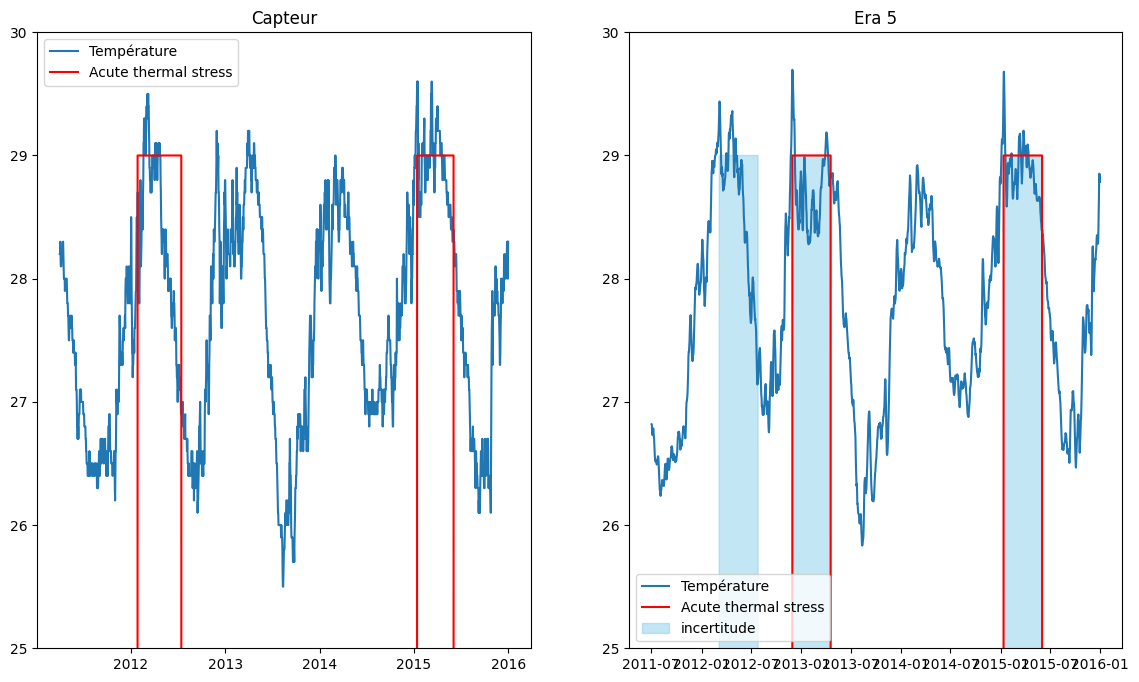

In [68]:
plt.figure(figsize=(10,20))
fig, axs = plt.subplots(1, 2, figsize = (14, 8))


# Premier sous-graphique
axs[0].plot(temp_2010['DateTime'], temp_2010['Temperature'], label = 'Température')
axs[0].plot(temp_2010['DateTime'], temp_2010['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# deuxième graphique
axs[1].plot(sst['DateTime'], sst['sst'], label = 'Température')
axs[1].plot(sst['DateTime'], sst['Acute thermal stress']*29, color = 'r', label = 'Acute thermal stress')
axs[1].fill_between(sst['DateTime'], sst['Acute thermal stress plage']*29, color='skyblue', alpha=0.5, label = 'incertitude')
axs[1].set_title('Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

### Thermal trajectory

In [69]:
deltaT = 0.09
deltaMMM = 0.08

In [70]:
threshold = 1.5

# Capteur
temp_2016['thermal_stress_category'] = ''

for i in range(temp_2016.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(temp_2016['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > temp_2016['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > temp_2016['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        temp_2016['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        temp_2016['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if temp_2016['Temperature'].iloc[i-10] >= temp_2016['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        temp_2016['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    if temp_2016['thermal_stress_category'].iloc[i] == '':
        temp_2016['thermal_stress_category'].iloc[i] = 0

'''    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(temp_2016['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > temp_2016['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        temp_2016['thermal_stress_category'].iloc[i] = 0'''
    
    

# Era 5
threshold = 1.5


sst_test['thermal_stress_category'] = ''
sst_test['thermal_stress_category_plage'] = ''

for i in range(sst_test.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(sst_test['sst'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > sst_test['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > sst_test['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT > sst_test['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT > sst_test['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        sst_test['thermal_stress_category'].iloc[i] = 2
    
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        sst_test['thermal_stress_category'].iloc[i] = 3
    
    if nb_depassant_MMM_threshold_plage >= 2:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if sst_test['sst'].iloc[i-10] >= sst_test['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        sst_test['thermal_stress_category'].iloc[i] = 1
    
    if sst_test['sst'].iloc[i-10] + deltaT >= sst_test['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        sst_test['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(sst_test['sst'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > sst_test['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> sst_test['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold == 0:
        sst_test['thermal_stress_category'].iloc[i] = 0

    if nb_depassant_MMM_threshold_plage == 0:
        sst_test['thermal_stress_category_plage'].iloc[i] = 0'''
    
    if sst_test['thermal_stress_category'].iloc[i] == '':
        sst_test['thermal_stress_category'].iloc[i] = 0
        
    if sst_test['thermal_stress_category_plage'].iloc[i] == '':
        sst_test['thermal_stress_category_plage'].iloc[i] = 0

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3956305317.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2016['thermal_stress_category'].iloc[i] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3956305317.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2016['thermal_stress_category'].iloc[i] = 2
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/3956305317.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

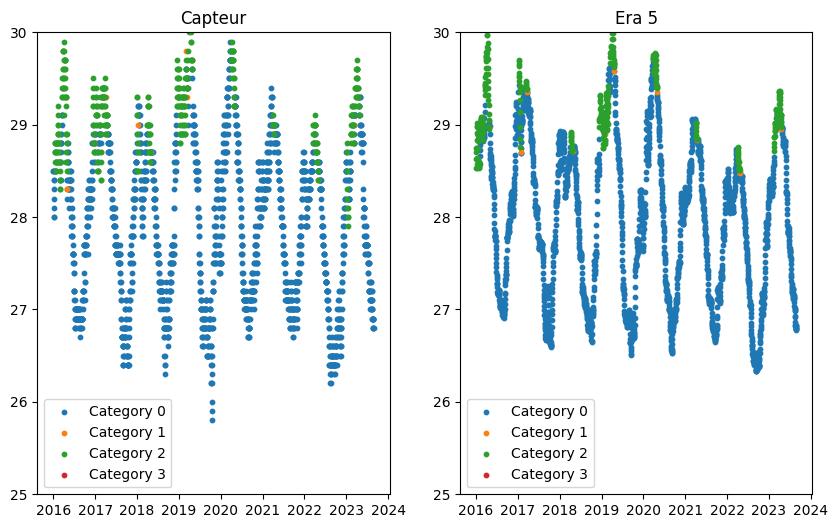

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2016[temp_2016['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1, 2, 3]:
    category_data_era5 = sst_test[sst_test['thermal_stress_category'] == category]
    axs[1].scatter(category_data_era5['DateTime'], category_data_era5['sst'], label=f'Category {category}', s = 10)
axs[1].set_title('Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [72]:
# pourcentage d'erreur
(temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category'])[temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category'] > 0].shape[0]/temp_2016.shape[0]

0.06363961387200572

In [73]:
(temp_2016['thermal_stress_category'] - sst_test['thermal_stress_category']).mean()

0.08830890239542367

#### Calcul incertitudes

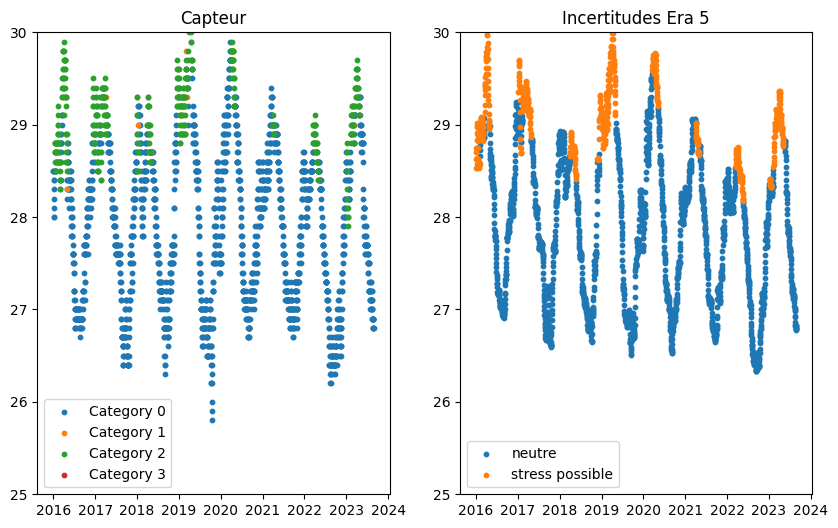

In [74]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2016[temp_2016['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
lib = ['neutre', 'stress possible']
for category in [0, 1]:
    category_data_era5_incertitude = sst_test[sst_test['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['sst'], label=lib[category], s = 10)
axs[1].set_title('Incertitudes Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [75]:
compte = pd.merge(temp_2016, sst_test, on = 'DateTime', how = 'inner')
print('nombre de jour de stress detecté:', compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].sum())
print('nombre de jour de stress réel:',compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].shape[0])

nombre de jour de stress detecté: 465
nombre de jour de stress réel: 503


#### Vérification

In [76]:
threshold = 1.5

# Capteur
temp_2010['thermal_stress_category'] = ''

for i in range(temp_2010.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(temp_2010['Temperature'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > temp_2010['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > temp_2010['MMM'].iloc[i] + threshold)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        temp_2010['thermal_stress_category'].iloc[i] = 2
    
    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        temp_2010['thermal_stress_category'].iloc[i] = 3
    
    # Condition 1
    if temp_2010['Temperature'].iloc[i-10] >= temp_2010['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        temp_2010['thermal_stress_category'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(temp_2010['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > temp_2010['MMM'].iloc[i] + threshold)
    if nb_depassant_MMM_threshold == 0:
        temp_2010['thermal_stress_category'].iloc[i] = 0'''
    
    if temp_2010['thermal_stress_category'].iloc[i] == '':
        temp_2010['thermal_stress_category'].iloc[i] = 0

# Era 5
threshold = 1.5


sst['thermal_stress_category'] = ''
sst['thermal_stress_category_plage'] = ''

for i in range(sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(sst['sst'].iloc[i-k])
    nb_depassant_MMM = sum(1 for valeur in dix_derniers_jours if valeur > sst['MMM'].iloc[i])
    nb_depassant_MMM_threshold = sum(1 for valeur in dix_derniers_jours if valeur > sst['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM > nb_depassant_MMM_threshold:
        sst['thermal_stress_category'].iloc[i] = 2
    
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold >= 2:
        sst['thermal_stress_category'].iloc[i] = 3
    
    if nb_depassant_MMM_threshold_plage >= 2:
        sst['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if sst['sst'].iloc[i-10] >= sst['MMM'].iloc[i-10] and nb_depassant_MMM == 1:
        sst['thermal_stress_category'].iloc[i] = 1
    
    if sst['sst'].iloc[i-10] + deltaT >= sst['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 0
    '''derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(sst['sst'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold = sum(1 for valeur in derniers_jours if valeur > sst['MMM'].iloc[i] + threshold)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> sst['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold == 0:
        sst['thermal_stress_category'].iloc[i] = 0

    if nb_depassant_MMM_threshold_plage == 0:
        sst['thermal_stress_category_plage'].iloc[i] = 0'''
    
    if sst['thermal_stress_category'].iloc[i] == '':
        sst['thermal_stress_category'].iloc[i] = 0
        
    if sst['thermal_stress_category_plage'].iloc[i] == '':
        sst['thermal_stress_category_plage'].iloc[i] = 0

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/611264989.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2010['thermal_stress_category'].iloc[i] = 2
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/611264989.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2010['thermal_stress_category'].iloc[i] = 1
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/611264989.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

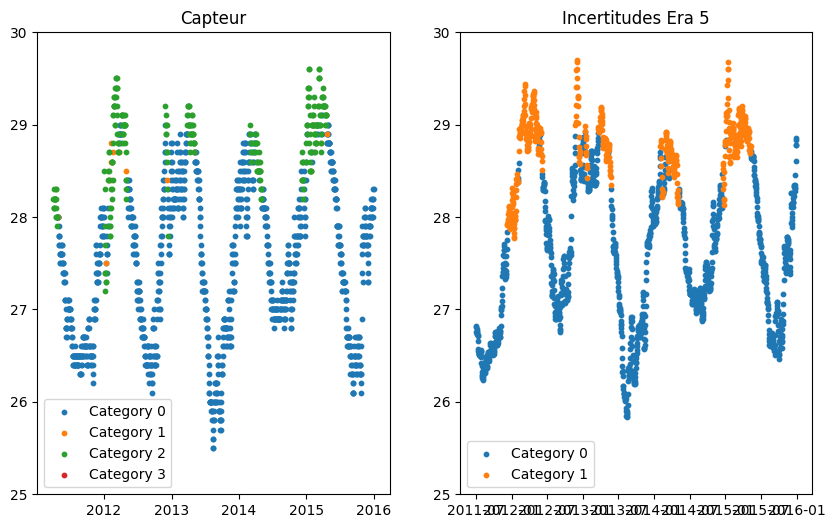

In [77]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Premier sous-graphique
for category in [0, 1, 2, 3]:
    category_data_capt = temp_2010[temp_2010['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Capteur')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1]:
    category_data_era5_incertitude = sst[sst['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['sst'], label=f'Category {category}', s = 10)
axs[1].set_title('Incertitudes Era 5')
axs[1].set_ylim(25, 30)
axs[1].legend()

In [78]:
compte = pd.merge(temp_2010, sst, on = 'DateTime', how = 'inner')
print('nombre de jour de stress detecté:', compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].sum())
print('nombre de jour de stress réel:',compte['thermal_stress_category_plage'][compte['thermal_stress_category_x'] != 0].shape[0])

nombre de jour de stress detecté: 274
nombre de jour de stress réel: 292


## Calcul incertitudes dataframe totale

### DHW

Text(0.5, 1.0, 'DHW')

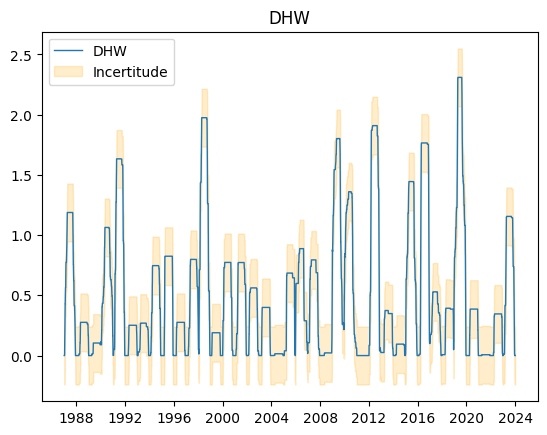

In [79]:
ecart =0.24
plt.plot(fill_sst['DateTime'], fill_sst['dhw'], linewidth = 1, label = 'DHW')
plt.fill_between(fill_sst['DateTime'], fill_sst['dhw'] - ecart, fill_sst['dhw'] + ecart, color='orange', alpha=0.2, label='Incertitude')
plt.legend()
plt.title('DHW')

### Acute thermal stress

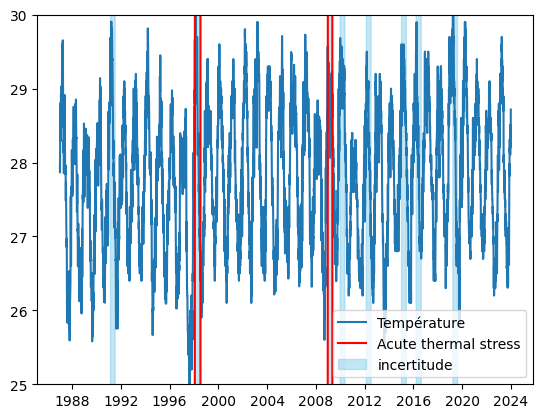

In [80]:
deltaT = 0.09
deltaMMM = 0.08

threshold = 0.8
fill_sst['excess max'] = fill_sst.apply(lambda row: 1 if row['Temperature'] + deltaT > row['MMM']+threshold - deltaMMM else 0, axis=1)
fill_sst['excess max'] = fill_sst['excess max'].rolling(window = 140, min_periods= 140).sum()
fill_sst['Acute thermal stress plage'] = fill_sst.apply(lambda row: 1 if row['excess max'] > 0 else 0, axis=1)
fill_sst.drop(columns='excess max', inplace = True)

plt.plot(fill_sst['DateTime'], fill_sst['Temperature'], label = 'Température')
plt.plot(fill_sst['DateTime'], fill_sst['Acute thermal stress']*30, color = 'r', label = 'Acute thermal stress')
plt.fill_between(fill_sst['DateTime'], fill_sst['Acute thermal stress plage']*30, color='skyblue', alpha=0.5, label = 'incertitude')
plt.ylim(25, 30)
plt.legend()

### Thermal trajectory

In [81]:
threshold = 1.5

fill_sst['thermal_stress_category_plage'] = ''

for i in range(fill_sst.shape[0]):

    dix_derniers_jours = []
    for k in range(10):
        if i>=k:
            dix_derniers_jours.append(fill_sst['Temperature'].iloc[i-k])
    nb_depassant_MMM_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] - deltaMMM)
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in dix_derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] + threshold - deltaMMM)

    # Condition 2
    if nb_depassant_MMM_plage > nb_depassant_MMM_threshold_plage:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1

    # Condition 3
    if nb_depassant_MMM_threshold_plage >= 2:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1
    
    # Condition 1
    if fill_sst['Temperature'].iloc[i-10] + deltaT >= fill_sst['MMM'].iloc[i-10] - deltaMMM and nb_depassant_MMM_plage == 1:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 1

    '''# Condition 0
    derniers_jours = []
    for k in range(90):
        if i>=k:
            derniers_jours.append(fill_sst['Temperature'].iloc[i-k]) #90 derniers jours
    nb_depassant_MMM_threshold_plage = sum(1 for valeur in derniers_jours if valeur + deltaT> fill_sst['MMM'].iloc[i] + threshold - deltaMMM)

    if nb_depassant_MMM_threshold_plage == 0:
        fill_sst['thermal_stress_category_plage'].iloc[i] = 0'''

    if fill_sst['thermal_stress_category_plage'].iloc[i] == '':
        fill_sst['thermal_stress_category_plage'].iloc[i] = 0

/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/595273418.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category_plage'].iloc[i] = 0
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/595273418.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_sst['thermal_stress_category_plage'].iloc[i] = 1
/var/folders/3g/zk_3s54x6xz0h9d8szsb16ph0000gn/T/ipykernel_73880/595273418.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

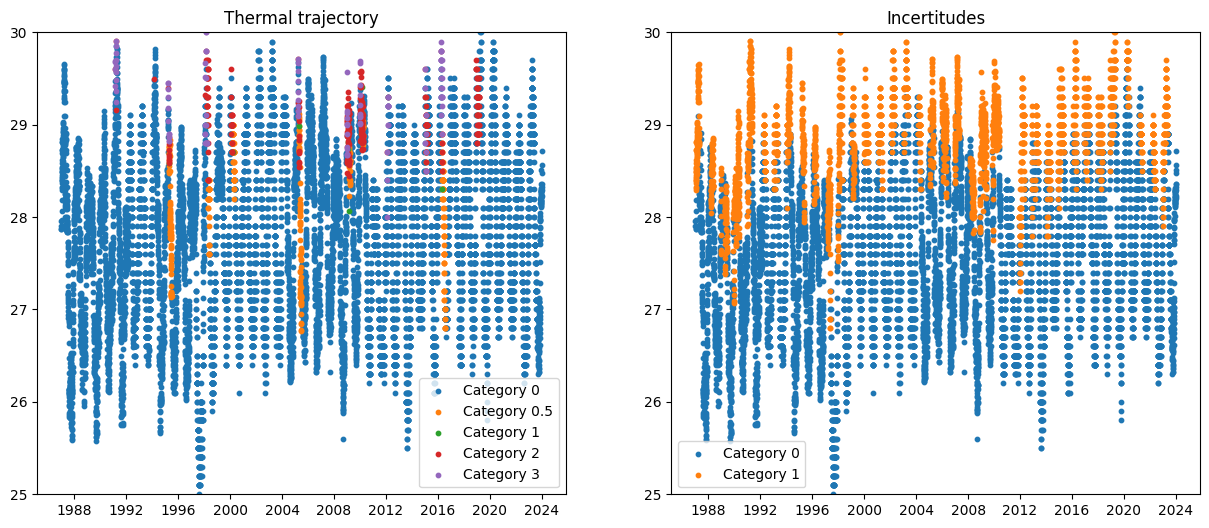

In [82]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

# Premier sous-graphique
for category in [0, 0.5, 1, 2, 3]:
    category_data_capt = fill_sst[fill_sst['thermal_stress_category'] == category]
    axs[0].scatter(category_data_capt['DateTime'], category_data_capt['Temperature'], label=f'Category {category}', s = 10)
axs[0].set_title('Thermal trajectory')
axs[0].set_ylim(25, 30)
axs[0].legend()

# Deuxième sous-graphique
for category in [0, 1]:
    category_data_era5_incertitude = fill_sst[fill_sst['thermal_stress_category_plage'] == category]
    axs[1].scatter(category_data_era5_incertitude['DateTime'], category_data_era5_incertitude['Temperature'], label=f'Category {category}', s = 10)
axs[1].set_title('Incertitudes')
axs[1].set_ylim(25, 30)
axs[1].legend()

# Export

In [83]:
fill_sst.to_csv('Tableaux finaux variables/fill_sst.csv', index = False)